In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

In [2]:
data=pd.read_csv('PimaIndians.csv')

In [3]:
data.head()

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
0,1,89,66,23,94,28.1,0.167,21,negatif
1,0,137,40,35,168,43.1,2.288,33,positif
2,3,78,50,32,88,31.0,0.248,26,positif
3,2,197,70,45,543,30.5,0.158,53,positif
4,1,189,60,23,846,30.1,0.398,59,positif


In [4]:
data.describe()

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000


In [5]:
import seaborn as sns

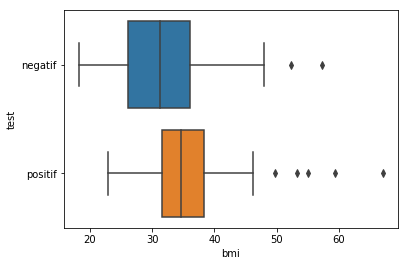

In [6]:
sns.boxplot(data=data,x='bmi',y='test')

C:\Users\vipin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



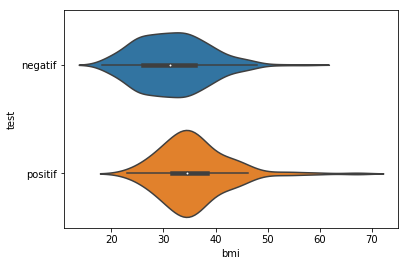

In [7]:
sns.violinplot(data=data,x='bmi',y='test')

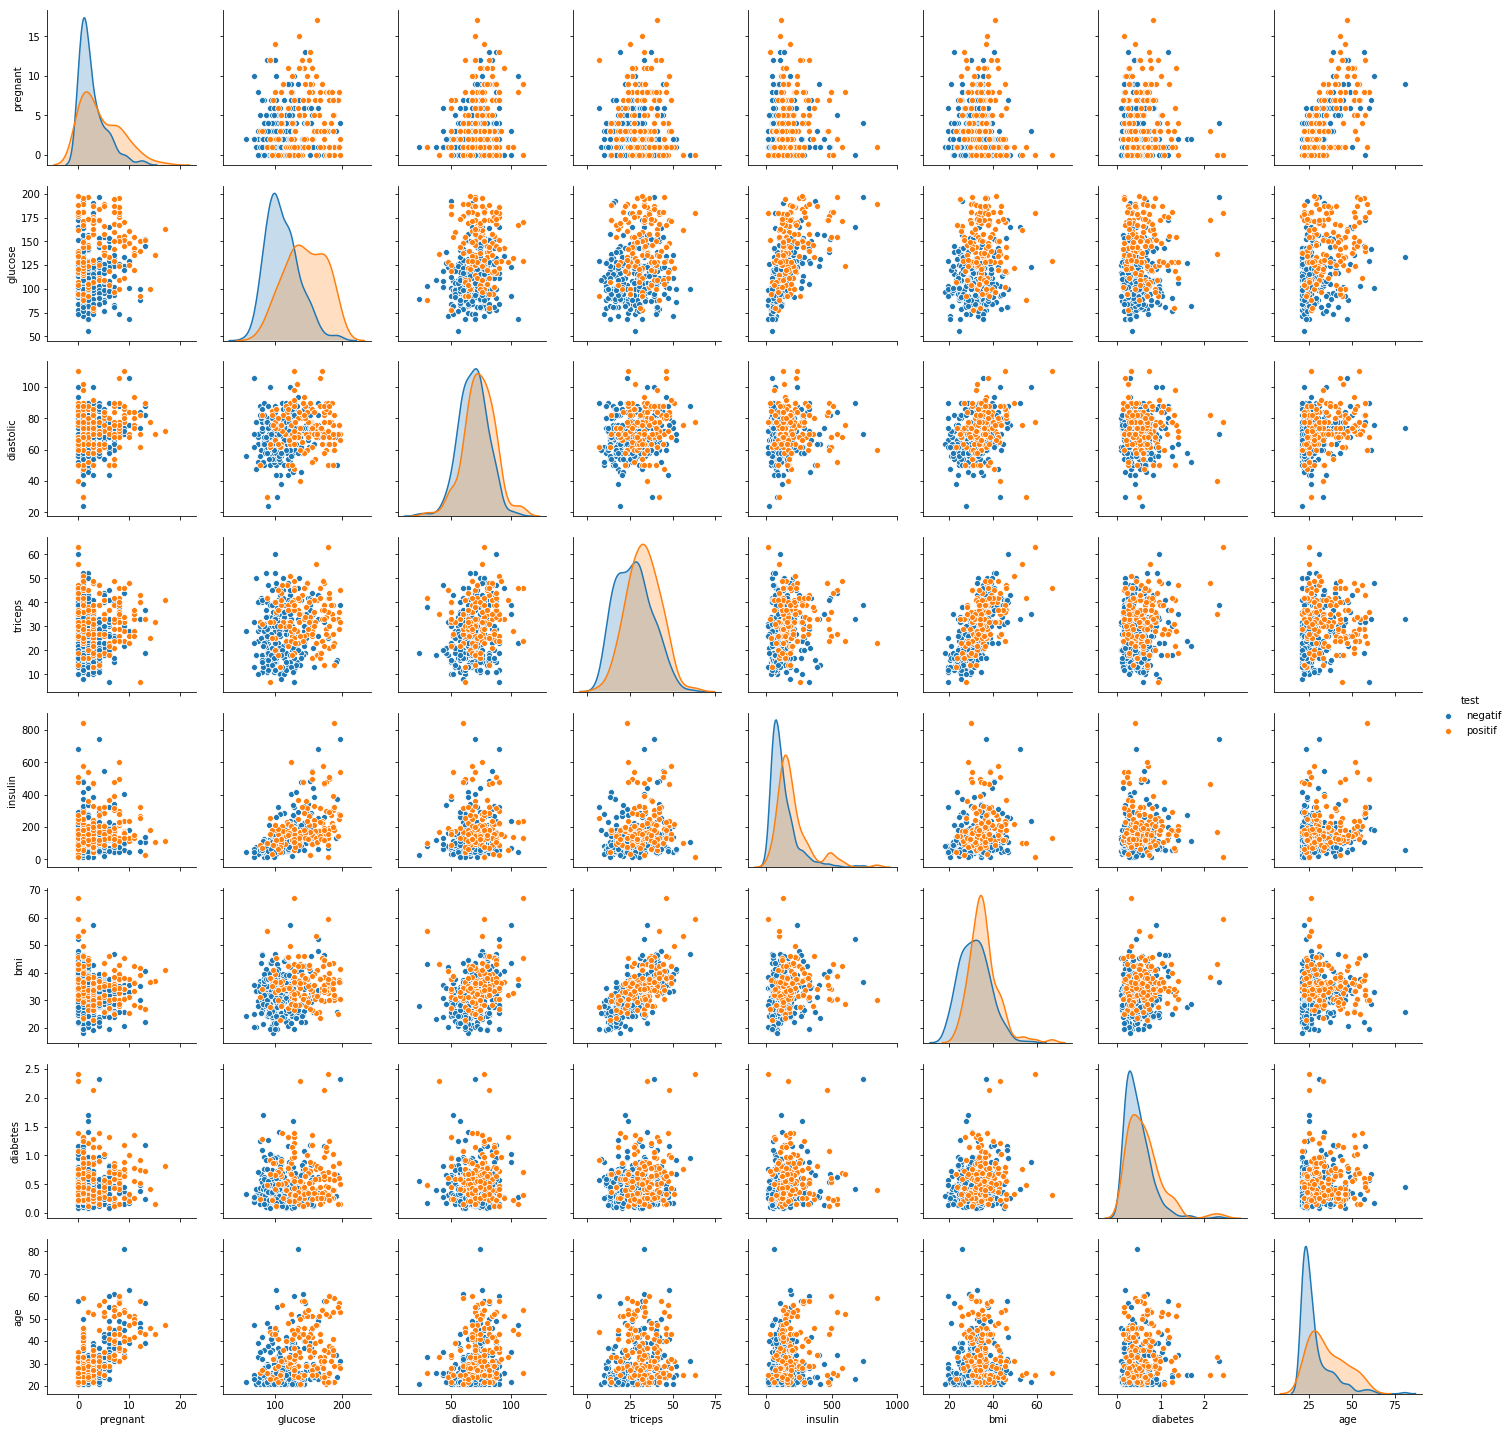

In [8]:
sns.pairplot(data=data,hue='test',diag_kind='kde')

## check for null values

In [9]:
data.isnull().sum()

pregnant     0
glucose      0
diastolic    0
triceps      0
insulin      0
bmi          0
diabetes     0
age          0
test         0
dtype: int64

In [10]:
labels=data['test']

In [11]:
data.drop('test',axis=1,inplace =True)

In [12]:
from scipy.spatial.distance import cdist
clusters=range(1,10)
meandist=[]
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(data)
    clusassign=model.predict(data)
    meandist.append(sum(np.min(cdist(data, model.cluster_centers_, 'euclidean'), axis=1))/ data.shape[0])

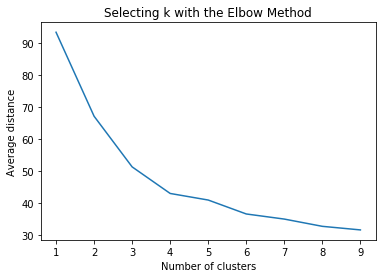

In [13]:
plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method')
plt.show()

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 8 columns):
pregnant     392 non-null int64
glucose      392 non-null int64
diastolic    392 non-null int64
triceps      392 non-null int64
insulin      392 non-null int64
bmi          392 non-null float64
diabetes     392 non-null float64
age          392 non-null int64
dtypes: float64(2), int64(6)
memory usage: 24.6 KB


In [15]:
import sklearn.cluster as clus

In [16]:
kmeans=clus.KMeans(n_clusters=6)

In [17]:
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [18]:
cluster=kmeans.predict(data)

In [19]:
cluster

array([2, 1, 2, 0, 4, 1, 1, 2, 5, 1, 5, 5, 5, 5, 1, 2, 1, 1, 5, 1, 2, 2,
       2, 3, 3, 3, 5, 5, 5, 2, 5, 2, 5, 3, 2, 5, 2, 5, 1, 2, 2, 1, 2, 2,
       1, 2, 5, 5, 2, 2, 5, 0, 2, 1, 2, 5, 5, 2, 5, 5, 5, 1, 1, 2, 5, 2,
       2, 3, 2, 3, 5, 1, 5, 0, 2, 5, 2, 5, 5, 3, 5, 2, 5, 2, 2, 5, 5, 5,
       0, 2, 5, 1, 5, 1, 2, 5, 3, 2, 1, 3, 2, 5, 1, 3, 5, 5, 0, 1, 2, 2,
       4, 2, 3, 2, 2, 1, 2, 1, 1, 4, 3, 2, 1, 3, 5, 5, 2, 2, 2, 2, 5, 3,
       5, 5, 5, 0, 1, 2, 2, 2, 2, 1, 1, 5, 3, 1, 1, 5, 2, 5, 5, 5, 1, 1,
       5, 5, 2, 2, 2, 5, 1, 2, 1, 5, 5, 2, 2, 2, 3, 1, 5, 2, 5, 2, 2, 2,
       1, 2, 3, 3, 3, 2, 2, 5, 0, 2, 2, 5, 3, 2, 2, 2, 2, 1, 2, 5, 2, 3,
       2, 1, 0, 2, 3, 5, 5, 1, 0, 1, 3, 2, 1, 0, 5, 1, 2, 2, 1, 3, 1, 5,
       1, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 1, 5, 2, 1, 2, 2, 2, 5, 2, 2, 5,
       1, 5, 2, 3, 2, 5, 1, 0, 3, 2, 5, 2, 5, 1, 2, 2, 5, 1, 2, 1, 2, 5,
       1, 3, 2, 5, 2, 5, 1, 5, 2, 2, 1, 5, 1, 1, 2, 2, 1, 1, 1, 5, 2, 2,
       5, 1, 3, 2, 2, 2, 2, 5, 5, 1, 2, 5, 3, 2, 5,

In [20]:
data['clusters']=cluster

In [21]:
trace = go.Scattergl(
    y = data['glucose'],
    x = data['insulin'] ,
    mode = 'markers',
    marker = dict(
        color = data['clusters'],
        
    )
)
datas = [trace]
plotly.offline.iplot(data)

PlotlyError: The `figure_or_data` positional argument must be `dict`-like, `list`-like, or an instance of plotly.graph_objs.Figure

In [22]:
trace1 = go.Scatter3d(
    x=data['glucose'],
    y=data['insulin'],
    z=data['age'],
    mode='markers',
    marker=dict(
        size=12,
        color=data['clusters'],                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)

datas = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=datas, layout=layout)
plotly.offline.iplot(fig, filename='3d-scatter-colorscale')